In [2]:
import sys
from pathlib import Path

import pandas as pd

sys.path.append(str(Path.cwd().parent))

from models.core.auxiliary import Auxiliary
from models.scenario.scenario import Scenario
from models.scenario.scenario_manager import ScenarioManager
from models.visualization.visualization import Visualization

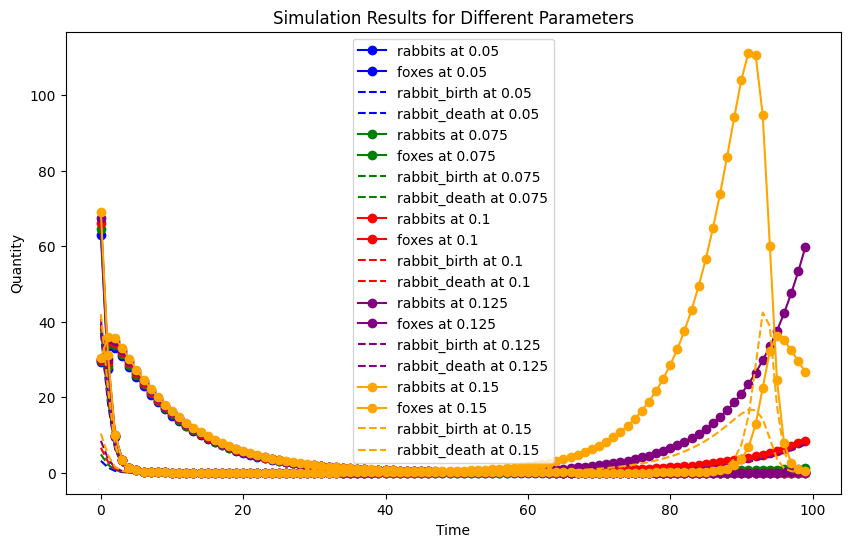

In [3]:
auxiliaries = [
    Auxiliary("rabbit_reproduction_rate", [0.1] * 1000),  # Constant value over time
    Auxiliary(
        "hunting_rate", [0.02, 0.015, 0.01, 0.005] * 250
    ),  # Pattern repeated over time
    Auxiliary(
        "fox_reproduction_rate", [0.01]
    ),  # Constant, using a list for consistency
    Auxiliary("fox_death_rate", 0.1),  # Constant, using a float
]

# Initial values for the stocks
initial_values = {"rabbits": 100, "foxes": 20}

# Rates and rate functions for the flows
rates = {
    "rabbit_birth": {
        "rate_function": lambda rabbits, rabbit_reproduction_rate: rabbits
        * rabbit_reproduction_rate,
        "source": None,
        "destination": "rabbits",
    },
    "rabbit_death": {
        "rate_function": lambda rabbits, foxes, hunting_rate: rabbits
        * foxes
        * hunting_rate,
        "source": "rabbits",
        "destination": None,
    },
    "fox_birth": {
        "rate_function": lambda rabbits, foxes, fox_reproduction_rate: rabbits
        * foxes
        * fox_reproduction_rate,
        "source": None,
        "destination": "foxes",
    },
    "fox_death": {
        "rate_function": lambda foxes, fox_death_rate: foxes * fox_death_rate,
        "source": "foxes",
        "destination": None,
    },
}
scenario1 = Scenario("Base Scenario", {"rabbits": 100, "foxes": 20}, rates, auxiliaries)
scenario2 = Scenario("High Rabbits", {"rabbits": 200, "foxes": 20}, rates, auxiliaries)

# Add scenarios to the manager
manager = ScenarioManager()
manager.add_scenario(scenario1)
manager.add_scenario(scenario2)

# Run all scenarios
manager.run_all(simulation_time=100, dt=1)

# Get results for a specific scenario
results = manager.get_results("Base Scenario")

# Définir la plage de valeurs pour rabbit_reproduction_rate
sensitivity_values = [0.05, 0.075, 0.1, 0.125, 0.15]

# Exécuter l'analyse de sensibilité sur le scénario 'Base Scenario'
sensitivity_results = scenario1.run_sensitivity_analysis_univariate(
    "auxiliaries", "rabbit_reproduction_rate", sensitivity_values , 100
)

visualization = Visualization(results)
visualization.plot_sensitivity_results(
    sensitivity_results,
    stock_names=["rabbits", "foxes"],
    flow_names=["rabbit_birth", "rabbit_death"],
)


In [4]:
from itertools import product


# Définition des plages de valeurs pour chaque paramètre
rabbit_reproduction_rates = [0.1, 0.15, 0.2]
hunting_rates = [0.01, 0.015, 0.02]

# Génération de toutes les combinaisons possibles de taux de reproduction et de chasse
param_combinations = list(product(rabbit_reproduction_rates, hunting_rates))

# Paramètres et leurs composants à modifier
parameters_to_test = [
    {'component': 'auxiliaries', 'name': 'rabbit_reproduction_rate'},
    {'component': 'auxiliaries', 'name': 'hunting_rate'}
]

# Exécution de l'analyse de sensibilité multivariable
multivariable_results = scenario1.run_sensitivity_analysis_multivariate(parameters_to_test, param_combinations,100)


In [5]:

# Base params correspond à la combinaison de paramètres de référence
base_params = (0.1, 0.01)  # Par exemple, taux de reproduction des lapins et taux de chasse de base

# Comparison params correspond aux autres combinaisons de paramètres pour lesquelles vous avez des résultats
comparison_params = [(0.15, 0.01), (0.2, 0.01)]  # Liste des autres paramètres

# Stock name est le nom de la variable pour laquelle vous calculez l'élasticité
stock_name = 'rabbits'

# Calculer les élasticités
elasticities = scenario1.calculate_elasticities(multivariable_results, base_params, comparison_params, stock_name)


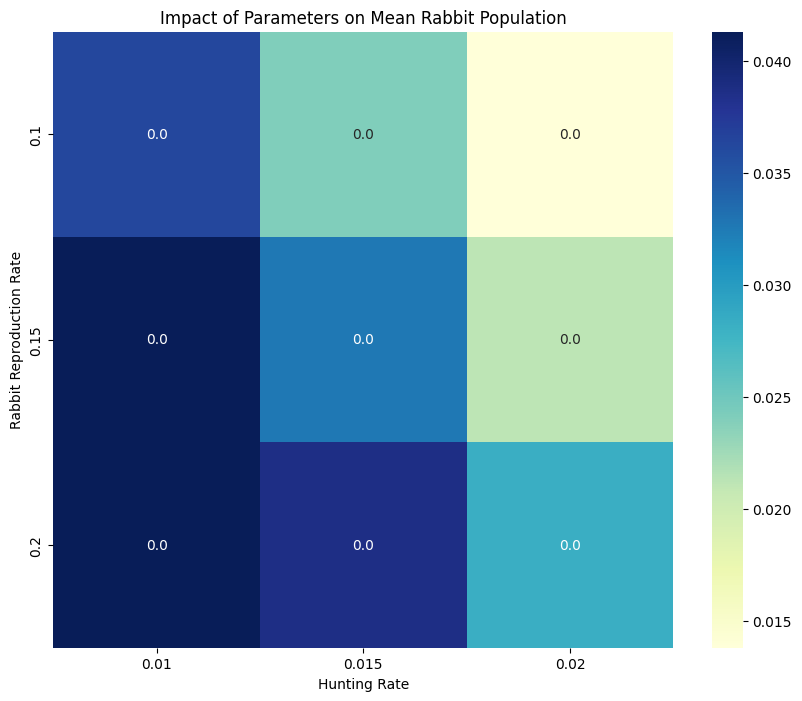

In [6]:
# Pour la heatmap de l'analyse de sensibilité multivariée
visualization.plot_sensitivity_heatmap(
    sensitivity_results=multivariable_results,
    param_names=['Rabbit Reproduction Rate', 'Hunting Rate'],
    stock_name='rabbits',
    aggfunc='min',  # Utilisez 'mean', 'max', 'min', 'median', etc.
    aggfunc_name='Min',  # Adaptez cela en fonction de la fonction d'agrégation choisie
    title='Impact of Parameters on Mean Rabbit Population'
)

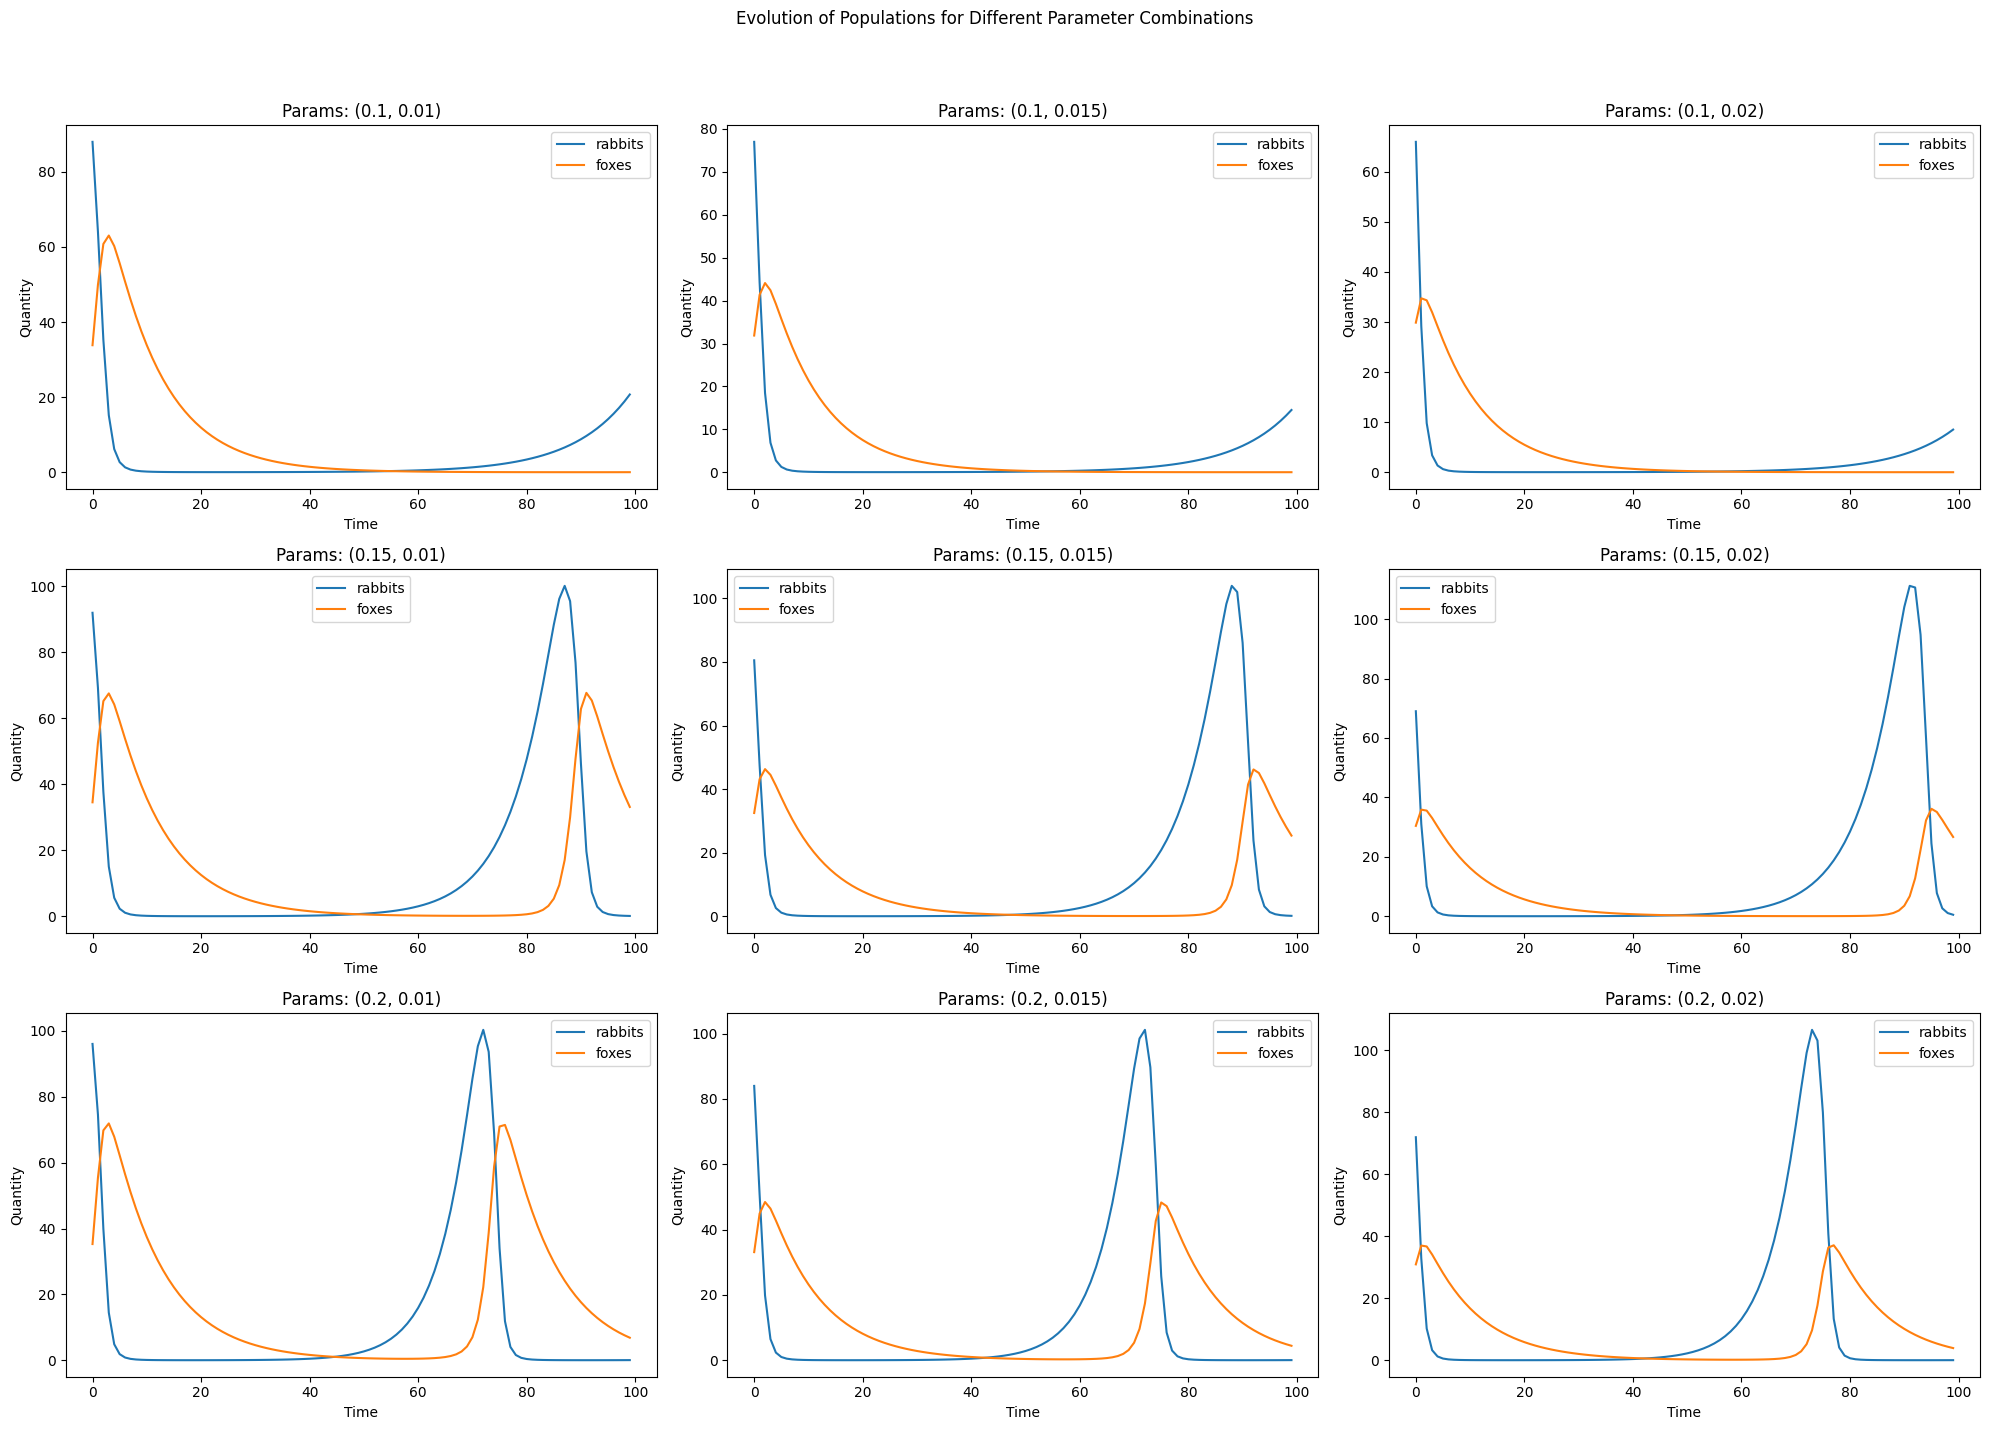

In [7]:
# Pour les sous-graphiques
visualization.plot_grid(
    simulation_results=multivariable_results,
    plot_columns=['rabbits', 'foxes'],
    title='Evolution of Populations for Different Parameter Combinations'
)

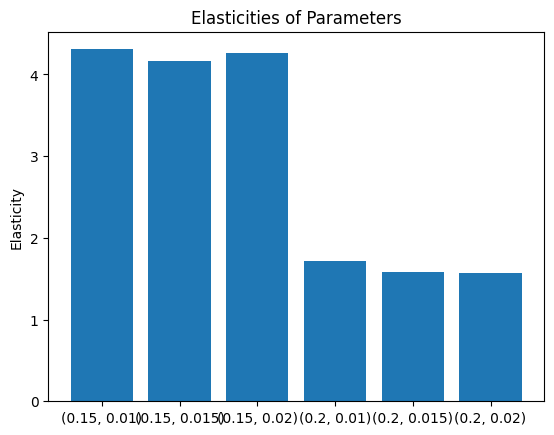

In [8]:
visualization.plot_elasticities(elasticities)

In [10]:
auxiliaries = [
    Auxiliary("rabbit_reproduction_rate", [0.1] * 1000),  # Constant value over time
    Auxiliary(
        "hunting_rate", [0.02, 0.015, 0.01, 0.005] * 250
    ),  # Pattern repeated over time
    Auxiliary(
        "fox_reproduction_rate", [0.01]
    ),  # Constant, using a list for consistency
    Auxiliary("fox_death_rate", 0.1),  # Constant, using a float
]

# Initial values for the stocks
initial_values = {"rabbits": 100, "foxes": 20}

# Rates and rate functions for the flows
rates = {
    "rabbit_birth": {
        "rate_function": lambda rabbits, rabbit_reproduction_rate: rabbits
        * rabbit_reproduction_rate,
        "source": None,
        "destination": "rabbits",
    },
    "rabbit_death": {
        "rate_function": lambda rabbits, foxes, hunting_rate: rabbits
        * foxes
        * hunting_rate,
        "source": "rabbits",
        "destination": None,
    },
    "fox_birth": {
        "rate_function": lambda rabbits, foxes, fox_reproduction_rate: rabbits
        * foxes
        * fox_reproduction_rate,
        "source": None,
        "destination": "foxes",
    },
    "fox_death": {
        "rate_function": lambda foxes, fox_death_rate: foxes * fox_death_rate,
        "source": "foxes",
        "destination": None,
    },
}
scenario1 = Scenario("Base Scenario", {"rabbits": 100, "foxes": 20}, rates, auxiliaries)


# Définition des chocs pour rabbit_birth_rate
rabbit_birth_rate_shock = {
    "component_name": "rabbit_reproduction_rate",
    "component_type": "auxiliary",
    "shock_value": 0.2,  # Nouvelle valeur de choc
    "start_time": 200,   # Début du choc
    "end_time": 300      # Fin du choc
}

# Définition des chocs pour un stock (par exemple, foxes)
foxes_stock_shock = {
    "component_name": "foxes",
    "component_type": "stock",
    "shock_value": 50,   # Nouvelle valeur de choc
    "start_time": 400,   # Début du choc
    "end_time": 500      # Fin du choc
}

# Application du test de stress sur rabbit_birth_rate
results_after_rabbit_shock = scenario1.apply_shock_over_period({"rabbit_reproduction_rate": rabbit_birth_rate_shock},1000)

# # Réinitialisation et application du test de stress sur les stocks (foxes)
# manager.reset_timesteps(scenario1)
# scenario1.apply_shock_over_period({"foxes": foxes_stock_shock},1000)
# results_after_foxes_shock = manager.get_results("Base Scenario")

# # Réinitialisation et application des tests de stress combinés
# manager.reset_timesteps(scenario1)
# scenario1.apply_shock_over_period({
#     "rabbit_birth_rate": rabbit_birth_rate_shock,
#     "foxes": foxes_stock_shock
# })
# results_after_combined_shock = manager.get_results("Base Scenario")

In [11]:
pd.DataFrame(scenario1.results)

,rabbits,foxes,rabbit_birth,rabbit_death,fox_birth,fox_death,rabbit_reproduction_rate,hunting_rate,fox_reproduction_rate,fox_death_rate,time
0,66.000000,29.880000,6.600000,39.441600,19.720800,2.988000,0.1,0.015,0.01,0.1,0
1,29.214240,34.748293,2.921424,20.302900,10.151450,3.474829,0.1,0.010,0.01,0.1,1
2,9.802474,34.339037,0.980247,6.732151,3.366075,3.433904,0.1,0.005,0.01,0.1,2
3,3.377356,31.948910,0.337736,2.158057,1.079028,3.194891,0.1,0.020,0.01,0.1,3
4,1.341229,29.139676,0.134123,0.781660,0.390830,2.913968,0.1,0.015,0.01,0.1,4
...,...,...,...,...,...,...,...,...,...,...,...
995,1.070839,0.014895,0.107084,0.000319,0.000159,0.001489,0.1,0.020,0.01,0.1,995
996,1.177572,0.013563,0.117757,0.000319,0.000160,0.001356,0.1,0.015,0.01,0.1,996
997,1.294977,0.012365,0.129498,0.000320,0.000160,0.001236,0.1,0.010,0.01,0.1,997
998,1.424123,0.011287,0.142412,0.000321,0.000161,0.001129,0.1,0.005,0.01,0.1,998


In [ ]:
df = pd.DataFrame(scenario1.results)
df[180:300].head(30)

,rabbits,foxes,rabbit_birth,rabbit_death,fox_birth,fox_death,rabbit_reproduction_rate,hunting_rate,fox_reproduction_rate,fox_death_rate,time
180,0.075795,0.263670,0.007580,0.000400,0.000200,0.026367,0.1,0.015,0.01,0.1,180
181,0.082935,0.237500,0.008294,0.000394,0.000197,0.023750,0.1,0.010,0.01,0.1,181
182,0.090795,0.213944,0.009080,0.000389,0.000194,0.021394,0.1,0.005,0.01,0.1,182
183,0.099448,0.192741,0.009945,0.000383,0.000192,0.019274,0.1,0.020,0.01,0.1,183
184,0.108971,0.173656,0.010897,0.000378,0.000189,0.017366,0.1,0.015,0.01,0.1,184
185,0.119451,0.156477,0.011945,0.000374,0.000187,0.015648,0.1,0.010,0.01,0.1,185
186,0.130985,0.141014,0.013099,0.000369,0.000185,0.014101,0.1,0.005,0.01,0.1,186
187,0.143678,0.127095,0.014368,0.000365,0.000183,0.012709,0.1,0.020,0.01,0.1,187
188,0.157644,0.114566,0.015764,0.000361,0.000181,0.011457,0.1,0.015,0.01,0.1,188
189,0.173011,0.103288,0.017301,0.000357,0.000179,0.010329,0.1,0.010,0.01,0.1,189
